## Modelo de Arboles de Decision

## Grupo 89

## Santiago Jimenez Diaz
## Jhon Jairo Jimenez Pena
## Ruben Dario Gallego Gomez
## Carlos Eduardo Trujillo Cortes 
## Allison Nahara Rodriguez Gutierrez


In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Análisis de variables del dataset para realizacion de analisis exploratorio

In [3]:
#Variables de entrada (basadas en pruebas fisicoquímicas):
#1 - acidez fija
#2 - acidez volátil
#3 - ácido cítrico
#4 - azúcar residual
#5 - cloruros
#6 - dióxido de azufre libre
#7 - dióxido de azufre total
#8 - densidad
#9 - pH
#10 - sulfatos
#11 - alcohol
#Variable de salida (basada en datos sensoriales):
#12 - calidad (puntuación entre 0 y 10)

In [4]:
data.shape

(1599, 12)

## se identifica que el data sets tiene 1599 filas y 12 columnas

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## En la imagen anterior se reflejo un resumen de los datos estadisticos de las variables de estudio.

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Se identifica en la imagen anterior que no hay valores nulos, por lo que no es necesario transformar los datos

In [7]:
#Se identifica la variable Objetivo "quality"

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

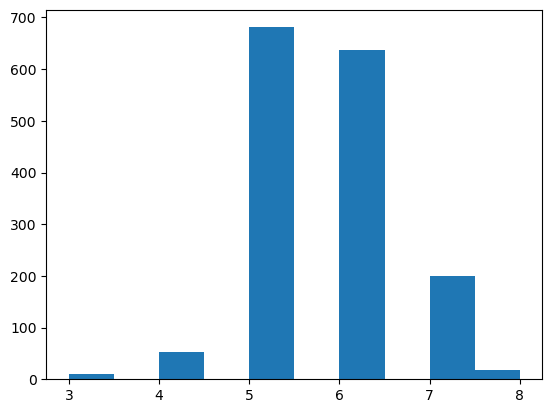

In [8]:
plt.hist(data.quality)

## en el histograma anterior se refleja la clasificacion de 0 a 10 de la calidad del vino,siendo el 8 el que representa el vino con mayor calidad

<Axes: xlabel='chlorides', ylabel='pH'>

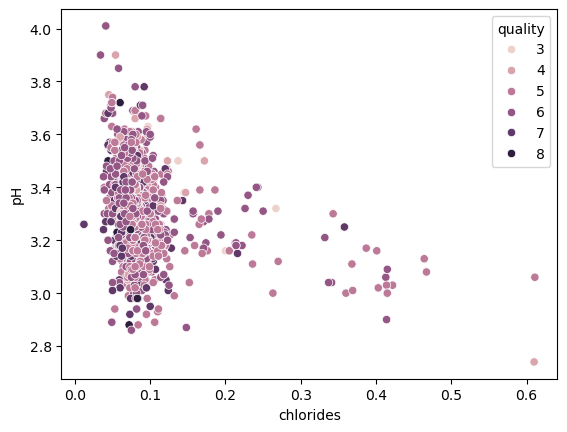

In [9]:
sns.scatterplot(x = "chlorides", y = "pH", hue = "quality", data = data)

## en el Histograma anterior se refleja en el eje Y el PH del vino siendo el 2.8 el vino con mayor acidez y en el eje X la cantida de sal que contiene cada tipo de vino, evidenciando que el que tiene calidad 3 con mayor cantidad de sal

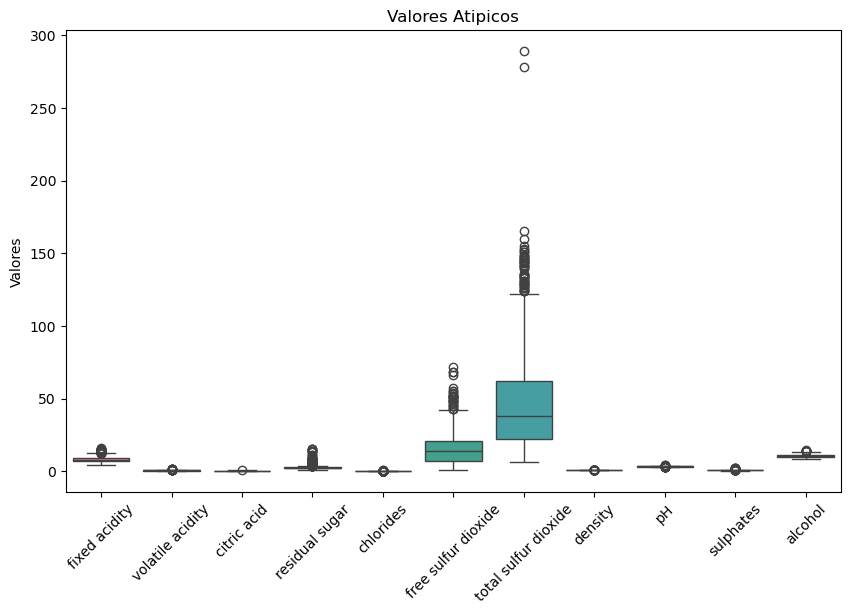

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Valores Atipicos')
plt.ylabel('Valores')
plt.show()

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [12]:
predictors_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target_col = ['quality']

In [13]:
predictors = data[predictors_col]
target = data[target_col]

In [14]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


## Se establece la correlacion existente entre las variables numericas

In [16]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


## Se evidencia que la variable con menor correolacion es el pH

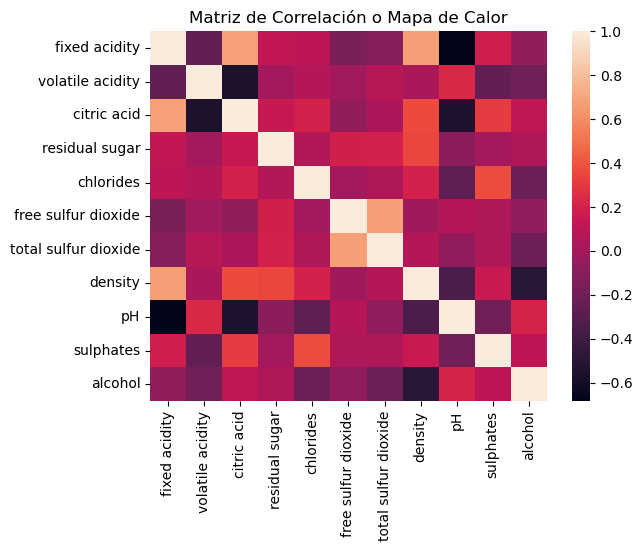

In [17]:
sns.heatmap(corr)
plt.title('Matriz de Correlación o Mapa de Calor')
plt.show()

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [19]:
tree = DecisionTreeClassifier()

In [20]:
arbol = tree.fit(X_train, y_train)

[Text(0.5181345927246359, 0.9782608695652174, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.2400447156927911, 0.9347826086956522, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.04241948153967007, 0.8913043478260869, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.015469212641247206, 0.8478260869565217, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.011601909480935403, 0.8043478260869565, 'x[4] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007734606320623603, 0.7608695652173914, 'x[1] <= 0.21\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.0038673031603118015, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.011601909480935403, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.015469212641247206, 0.76086

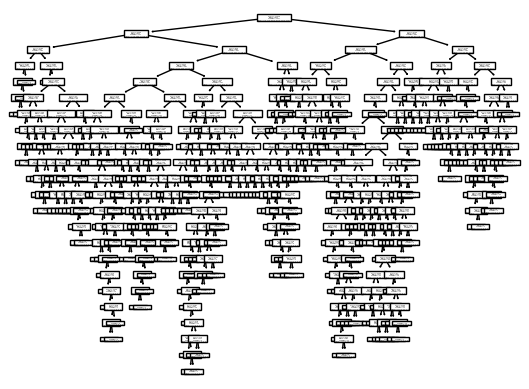

In [21]:
plot_tree(arbol)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [22]:
predicciones = arbol.predict(X_test)

In [23]:
predicciones

array([7, 7, 5, 5, 6, 5, 5, 8, 6, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6,
       4, 5, 6, 6, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 4, 7, 7, 6, 5, 6, 6, 6, 5, 7, 6, 5, 7, 6, 5, 6, 5, 7,
       7, 7, 6, 6, 6, 5, 6, 7, 5, 5, 7, 4, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 8, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       4, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5,

In [24]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,3,3,1,1,0
5,1,2,107,30,6,0
6,0,5,31,73,12,3
7,0,0,3,13,19,0
8,0,0,2,1,3,0


In [25]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.63125

In [26]:
precision = precision_score(y_test, predicciones, average='weighted')
precision


0.630010892016997

In [27]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.63125

In [28]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.630035613464775

## 8. Interpretar, analizar y documentar los resultados obtenidos.

In [30]:
#La evaluación realizada al modelo de Arbol de decision por medio del análisis de precisión, recall, F1-score

#Precisión: El modelo nos indica una precisión del 0.63 en cuanto a la calidad del vino

#Recall: El recall nos indica que el modelo de arbol de decision  identifico 63% de los datos del data sets

#F1-Score: El F1-score es la media armónica entre precisión y recall, El F1-score presentado por el modelo de Arbol de decision es de 0.63, lo que indica una confiabilida aceptable

#Accuracy: La exactitud es el porcentaje total de predicciones correctas realizadas por el modelo, el modelo fue correcto en el 63% de las ocasiones, lo que nos indica una exactitud acetable.